In [5]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [6]:
initial_nodes = 100
final_nodes = 10000
m = 3

Start with {initial_nodes} nodes. Links are chosen arbitrarily such that each node has at least degree one

We are taking the initial graph as Wheel Graph with {initial_nodes} nodes

Node 0 has maximum degree of the initialized graph


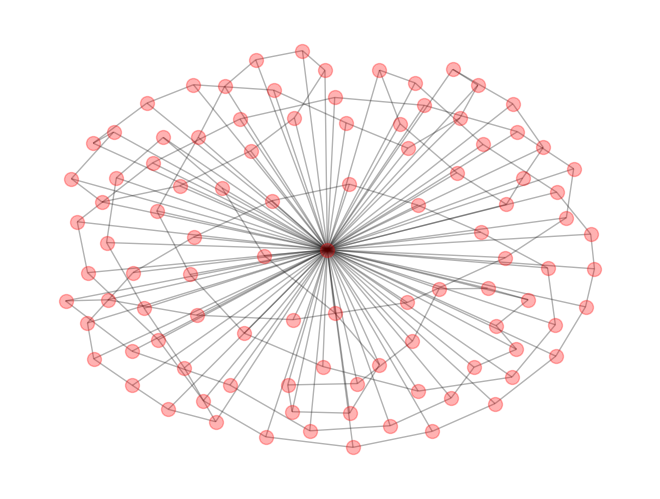

In [7]:
G = nx.wheel_graph(initial_nodes)

max_degree = 1
max_degree_node = 0

total_degree = 0
node_times = []
for node, d in G.degree():
    total_degree += G.degree(node)
    node_times.append(0)

    if d>max_degree:
        max_degree=d
        max_degree_node = node

nodes_probability = [G.degree(node) / total_degree for node in G.nodes()]


# print(node_times)
print(f"Node {max_degree_node} has maximum degree of the initialized graph")
# print(node_times[max_degree_node])

COLOR = '#FF0000'
nx.draw(G, alpha = .3, node_color = COLOR, node_size=100)

Growth: At the each step we add a new node with m links that connect to m nodes in the network

Preferential Attachment: The probability of the link that the new node connects with a node with degree ki -> {G.degree(node)} is (G.degree(node) / total_degree)

In [8]:
for new_node in range(initial_nodes, final_nodes):

  #choose
  random_probability_node = np.random.choice(G.nodes(),size=m,replace=False, p=nodes_probability)

  node_times.append(new_node - initial_nodes + 1)

  #adding the new_node to the Graph
  G.add_node(new_node)
  
  #connecting m links from new_node to nodes random_probability_node
  for i in range(m):
    G.add_edge(new_node, random_probability_node[i])
  

  total_degree = 0
  for node, d in G.degree():
      total_degree += G.degree(node)

      if d>max_degree:
          max_degree=d
          max_degree_node = node
  
  #updating the every node probability after adding a new_node
  nodes_probability = [G.degree(node) / total_degree for node in G.nodes()]

print(f"Node {max_degree_node} has the highest degree of {max_degree} at time t = {node_times[max_degree_node]}")

Node 0 has the highest degree of 1019 at time t = 0


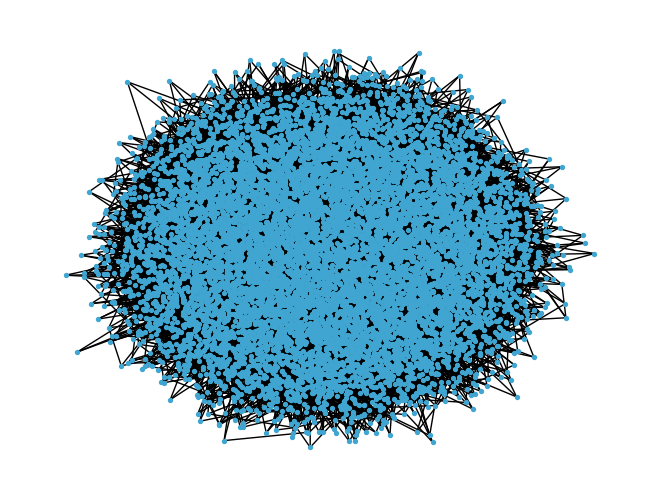

In [9]:
COLOR = '#40a6d1'
nx.draw(G, node_color = COLOR, node_size=8)

Text(0.5, 0, 'k')

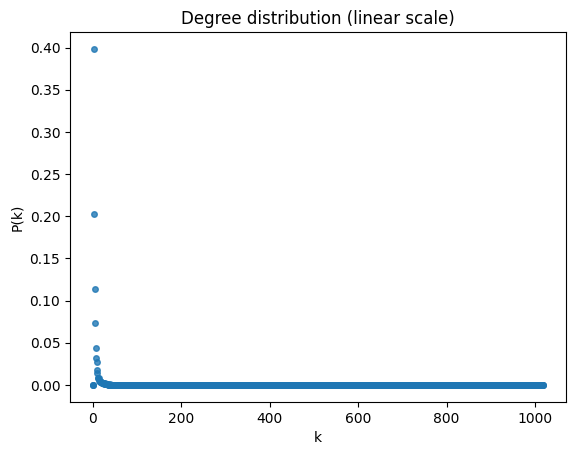

In [10]:
x = []
y_tmp = []
    
# Loop over all degrees until the maximum to compute the portion of nodes for that degree
for i in range(max_degree + 1):
    x.append(i)
    y_tmp.append(0)
    for n in G.nodes():
        if G.degree(n) == i:
            y_tmp[i] += 1
    y = [i / final_nodes for i in y_tmp] 

plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 4, alpha = .8)
plt.title('Degree distribution (linear scale)')
plt.ylabel('P(k)')
plt.xlabel('k')

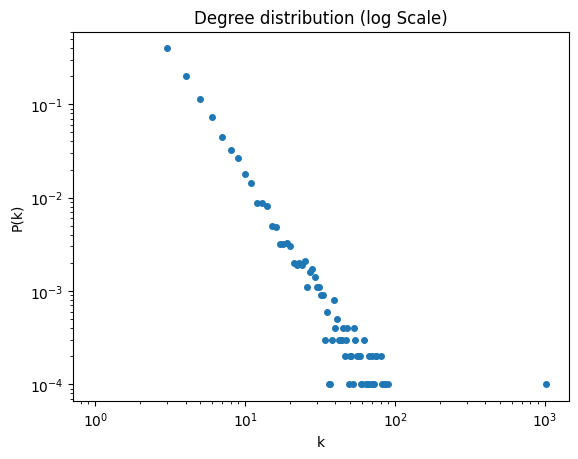

In [11]:
# degree distribution of the network
degree_sequence = [d for n, d in G.degree()]
degree_counts = nx.degree_histogram(G)

plt.loglog(range(len(degree_counts)), y, 'o', markersize=4)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Degree distribution (log Scale)')
plt.show()


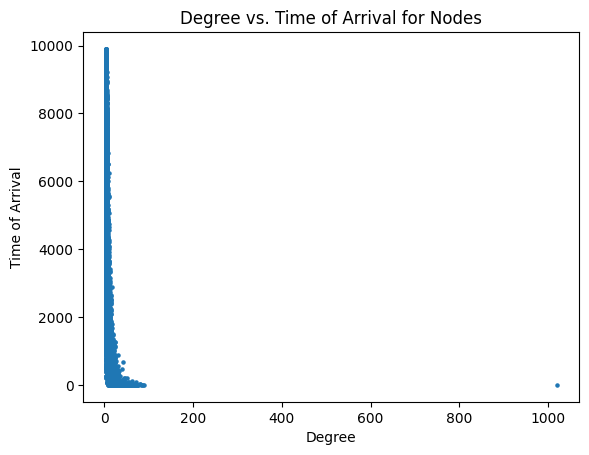

In [12]:
nodes_degree = [G.degree(node) for node in G.nodes()]

plt.scatter(nodes_degree, node_times, s=5)
plt.xlabel('Degree')
plt.ylabel('Time of Arrival')
plt.title('Degree vs. Time of Arrival for Nodes')
plt.show()

In [38]:
import math
phi = (1 + math.sqrt(5)) / 2.0  # largest eigenvalue of adj matrix

import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [14]:
pos = nx.spring_layout(G)

In [19]:
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

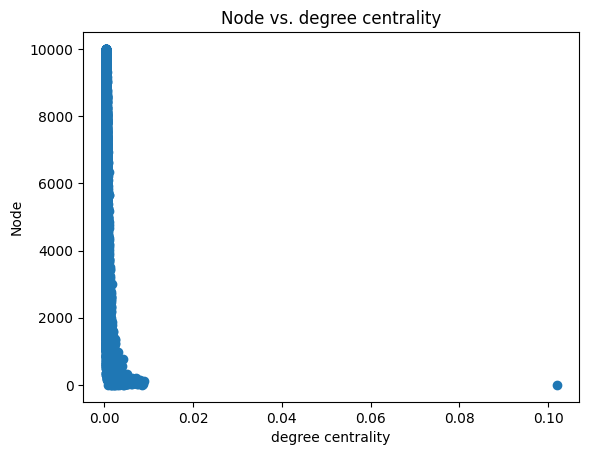

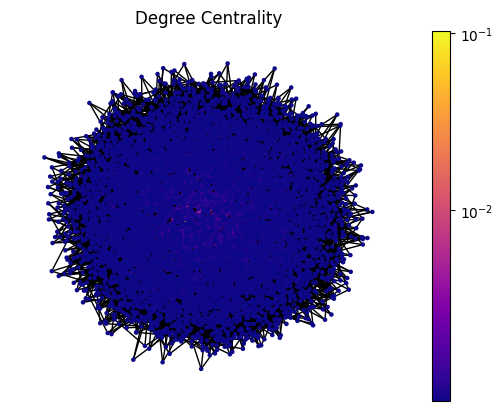

0, 0.1019
104, 0.0089
20, 0.0086
1, 0.0085
19, 0.0082


In [50]:
plt.scatter(list(degree_centrality.values()), G.nodes())
plt.ylabel('Node')
plt.xlabel('degree centrality')
plt.title('Node vs. degree centrality')
plt.show()

draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

sorted_degree = dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))

# Get the top 5 values and their keys
degree_values = list(sorted_degree.values())[:5]
degree_node = list(sorted_degree.keys())[:5]

for i in range(5):
    print(f"{degree_node[i]}, {degree_values[i]:.4f}")


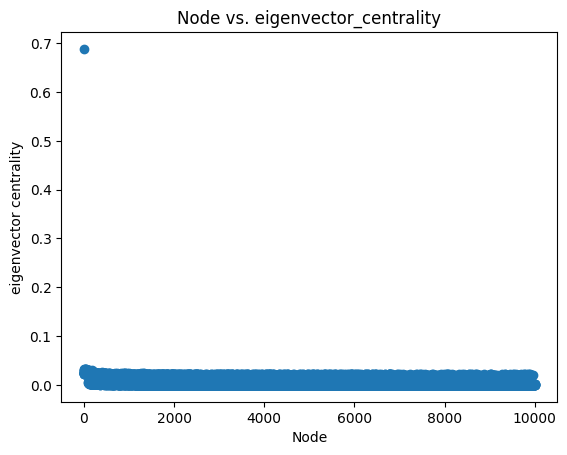

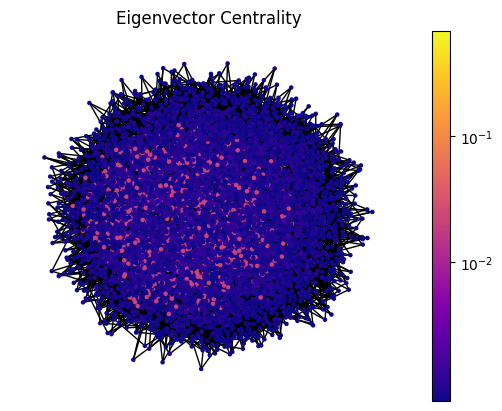

0, 0.1019
20, 0.0089
34, 0.0086
13, 0.0085
43, 0.0082


In [49]:
plt.scatter(G.nodes(), list(eigenvector_centrality.values()))
plt.xlabel('Node')
plt.ylabel('eigenvector centrality')
plt.title('Node vs. eigenvector_centrality')
plt.show()

draw(G, pos, eigenvector_centrality, 'Eigenvector Centrality')

sorted_eigenvector = dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True))

eigenvector_values = list(sorted_eigenvector.values())[:5]
eigenvector_node = list(sorted_eigenvector.keys())[:5]

for i in range(5):
    print(f"{eigenvector_node[i]}, {degree_values[i]:.4f}")


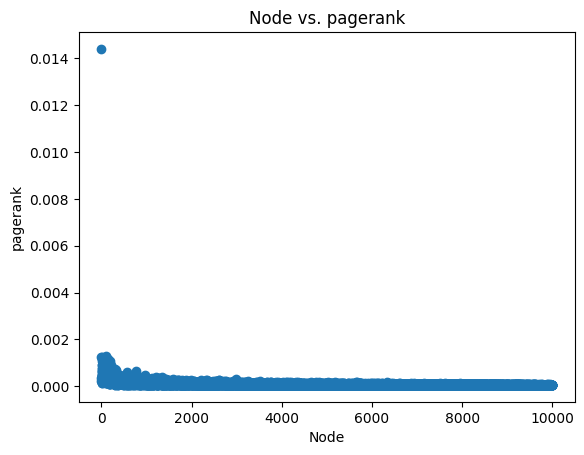

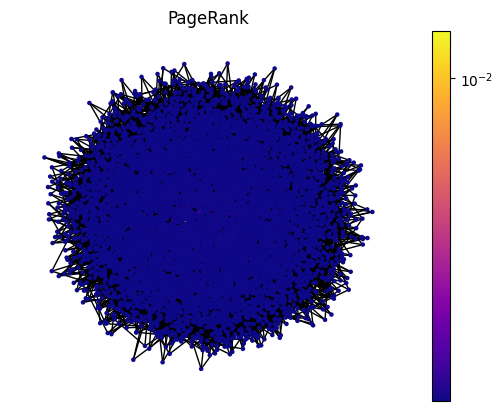

0, 0.0144
104, 0.0013
20, 0.0012
1, 0.0012
19, 0.0012


In [54]:
plt.scatter(G.nodes(), list(pagerank.values()))
plt.xlabel('Node')
plt.ylabel('pagerank')
plt.title('Node vs. pagerank')
plt.show()

draw(G, pos, pagerank, 'PageRank')

sorted_pagerank = dict(sorted(pagerank.items(), key=lambda x: x[1], reverse=True))

pagerank_values = list(sorted_pagerank.values())[:5]
pagerank_node = list(sorted_pagerank.keys())[:5]

for i in range(5):
    print(f"{pagerank_node[i]}, {pagerank_values[i]:.4f}")

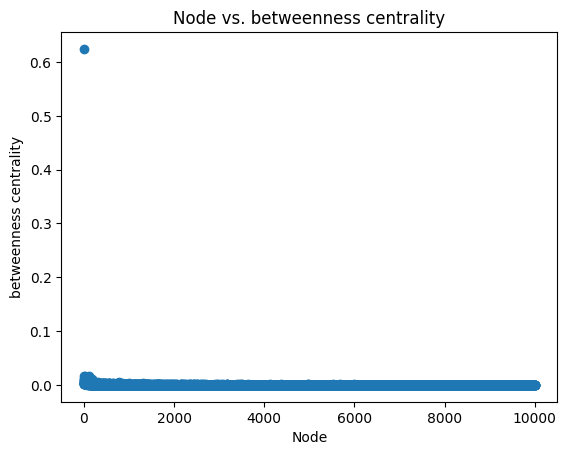

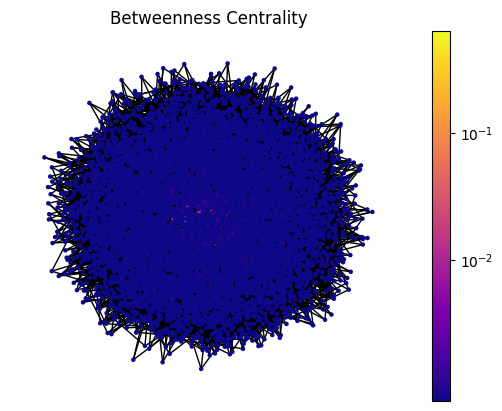

0, 0.6244
1, 0.0173
19, 0.0162
104, 0.0161
20, 0.0156


In [52]:
plt.scatter(G.nodes(), list(betweenness_centrality.values()))
plt.xlabel('Node')
plt.ylabel('betweenness centrality')
plt.title('Node vs. betweenness centrality')
plt.show()

draw(G, pos, betweenness_centrality, 'Betweenness Centrality')

sorted_betweenness = dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True))

betweenness_values = list(sorted_betweenness.values())[:5]
betweenness_node = list(sorted_betweenness.keys())[:5]

for i in range(5):
    print(f"{betweenness_node[i]}, {betweenness_values[i]:.4f}")

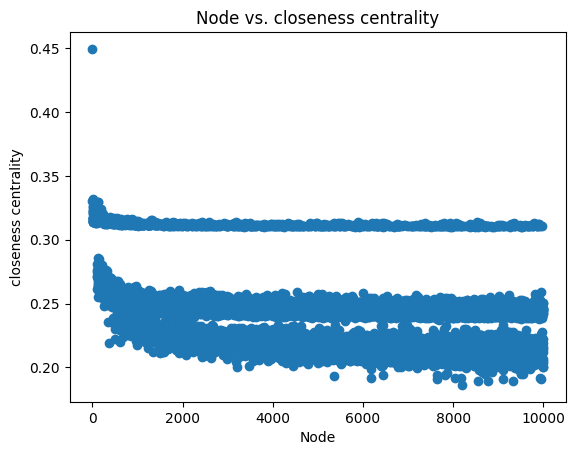

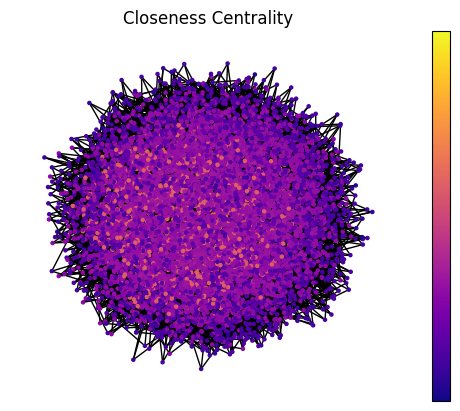

0, 0.4494
19, 0.3321
1, 0.3307
20, 0.3303
119, 0.3296


In [53]:
plt.scatter(G.nodes(), list(closeness_centrality.values()))
plt.xlabel('Node')
plt.ylabel('closeness centrality')
plt.title('Node vs. closeness centrality')
plt.show()

draw(G, pos, closeness_centrality, 'Closeness Centrality')

sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True))

closeness_values = list(sorted_closeness.values())[:5]
closeness_node = list(sorted_closeness.keys())[:5]

for i in range(5):
    print(f"{closeness_node[i]}, {closeness_values[i]:.4f}")

In [34]:
# Find the giant component in S
components = nx.connected_components(G)
giant_component = max(components, key=len)

# Compute the ratio of nodes in the giant component to the total number of nodes in S
ratio = len(giant_component) / len(G)

print("Ratio of nodes in giant component to total nodes in S:", ratio)

Ratio of nodes in giant component to total nodes in S: 1.0


In [57]:
# Select a random node in G and initialize its information
node = rd.choice(list(G.nodes()))
G.nodes[node]['info'] = 'I'

# Define the information propagation function
def propagate_info(G, p):
    steps = 0
    new_info = set()
    old_info = set([node])
    while len(old_info) > 0:
        for n in old_info:
            neighbors = list(G.neighbors(n))
            for neighbor in neighbors:
                if 'info' not in G.nodes[neighbor]:
                    if rd.random() < p:
                        G.nodes[neighbor]['info'] = 'I'
                        new_info.add(neighbor)
        old_info = new_info.copy()
        new_info.clear()
        steps += 1
    return steps

# Perform the information propagation experiment for different values of p
probabilities = [0.25, 0.5, 0.75, 1]
num_experiments = 10
avg_steps_list = []
for p in probabilities:
    total_steps = 0
    for i in range(num_experiments):
        # Reset the information on all nodes in G
        for n in G.nodes():
            if 'info' in G.nodes[n]:
                del G.nodes[n]['info']
        G.nodes[node]['info'] = 'I'
        # Run the information propagation experiment and record the number of steps
        steps = propagate_info(G, p)
        total_steps += steps
    # Compute and print the average number of steps required
    avg_steps = total_steps / num_experiments
    avg_steps_list.append(avg_steps)
    print(f"Average number of steps to propagate information with p={p}: {avg_steps}")

Average number of steps to propagate information with p=0.25: 14.2
Average number of steps to propagate information with p=0.5: 10.8
Average number of steps to propagate information with p=0.75: 7.9
Average number of steps to propagate information with p=1: 6.0


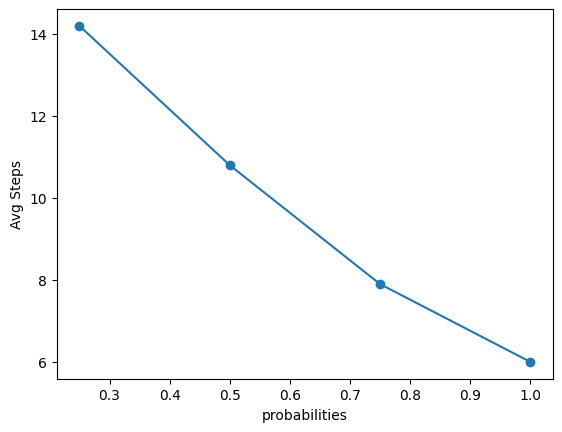

In [59]:

plt.plot(probabilities, avg_steps_list, '-o')
plt.xlabel('probabilities')
plt.ylabel('Avg Steps')
plt.show()